
##  <span style="color:black;font-family: Times New Roman"><u>CSYE7105 HW2</u></span> 

### Author : Shivani Shekhawat 
### NUID : 002656554

## <u>Part 1</u>

### 1. Please use two methods of multiprocessing.Pool: apply(), map() (or startmap) to implement the row wise common items in list_a and list_b; and print the result.

apply() and starmap() are two methods of the multiprocessing.Pool object in Python that can be used to execute functions in parallel.
- apply() applies a function to a single argument, while starmap() applies a function to multiple arguments passed as tuples. 
- starmap() is useful when the function takes multiple arguments, and the arguments are stored in a list of tuples.

In [18]:
from multiprocessing import Pool

# Define the lists
list_a = [[1, 2, 3], [5, 6, 7, 8], [10, 11, 12], [20, 21]]
list_b = [[2, 3, 4, 5], [6, 9, 10], [11, 12, 13, 14], [21, 24, 25]]

# Define a function to find common items in two lists
def find_common_items(a, b):
    return list(set(a) & set(b))

# Create a Pool object
pool = Pool()

# Use apply() to find common items
result_apply = [pool.apply(find_common_items, args=(a, b)) for a, b in zip(list_a, list_b)]
print(result_apply)

# Use map() to find common items
result_map = pool.starmap(find_common_items, zip(list_a, list_b))
print(result_map)

pool.close()

[[2, 3], [6], [11, 12], [21]]
[[2, 3], [6], [11, 12], [21]]


### 2. Please use two methods of multiprocessing.Pool: apply(), map() (or startmap) to normalize each row of 2d array (list) list_c to vary between 0 and 1, and print the result.  

Below code creates a normalize() function that takes a row of list_c as input and returns the normalized row. The apply() method of the multiprocessing.Pool object is used to apply the normalize() function to each row in parallel.

In [19]:
import numpy as np

# Define the list
list_c = [[2, 3, 4, 5], [6, 9, 10, 12], [11, 12, 13, 14], [21, 24, 25, 26]]

# Define a function to normalize a list
def normalize(lst):
    min_val = min(lst)
    max_val = max(lst)
    return [(i - min_val) / (max_val - min_val) for i in lst]

# Create a Pool object
pool = Pool()

# Use apply() to normalize the list
result_apply = [pool.apply(normalize, args=(lst,)) for lst in list_c]
print(result_apply)

# Use map() to normalize the list
result_map = pool.map(normalize, list_c)
print(result_map)

pool.close()

[[0.0, 0.3333333333333333, 0.6666666666666666, 1.0], [0.0, 0.5, 0.6666666666666666, 1.0], [0.0, 0.3333333333333333, 0.6666666666666666, 1.0], [0.0, 0.6, 0.8, 1.0]]
[[0.0, 0.3333333333333333, 0.6666666666666666, 1.0], [0.0, 0.5, 0.6666666666666666, 1.0], [0.0, 0.3333333333333333, 0.6666666666666666, 1.0], [0.0, 0.6, 0.8, 1.0]]


## <u>Part 2</u>

- ### Create a DataFrame. The required values are arbitrary integer numbers in [1,10), the shape of this df is (20000, 200).

- To create a DataFrame with arbitrary integer numbers in the range [1, 10) and shape (20000, 200) using Pandas, we can use the numpy.random.randint() function to generate random integers and then create a DataFrame from the resulting NumPy array.
- The pd.DataFrame() function is then used to create a DataFrame from the NumPy array. The resulting DataFrame is printed to the console.

In [20]:
import pandas as pd
import multiprocessing as mp

df = pd.DataFrame(np.random.randint(1, 10, (20000, 200)))
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1,1,7,9,7,7,3,3,3,2,...,3,5,3,3,6,2,4,7,2,6
1,9,6,7,5,3,7,9,5,9,9,...,2,9,2,3,3,3,3,2,7,8
2,4,2,3,1,6,5,8,5,7,1,...,5,6,5,2,2,5,6,9,4,3
3,2,1,1,4,4,4,7,7,5,3,...,4,1,8,2,7,8,2,4,3,4
4,5,1,6,8,2,5,6,9,3,1,...,4,6,2,1,9,6,7,3,7,4
5,7,7,4,8,6,8,1,7,7,8,...,4,3,5,9,8,3,8,3,8,1
6,5,4,1,3,3,4,5,2,3,2,...,1,7,8,3,8,6,8,4,1,2
7,5,5,9,9,8,6,6,1,5,5,...,1,7,1,4,4,5,1,5,3,7
8,7,6,1,1,1,9,9,8,1,6,...,1,5,7,5,4,8,2,9,3,4
9,8,1,4,7,2,9,7,2,3,9,...,8,8,9,6,5,2,7,4,9,2


- ### Define a function to calculate this: for each row of a dataframe, square every values, then add them all up, and then take the square root.

- ### Parallelize the function with two methods of multiprocessing.Pool.

   To define a function that calculates the square root of the sum of the squares of each row of a DataFrame, we can use the apply() method of the DataFrame to apply a function to each row. The function   will square each value in the row, sum the squares, and then take the square root of the sum.

In [22]:
import time

# Create a DataFrame
df = pd.DataFrame(np.random.randint(1, 10, (20000, 200)))

# Define the function
def calculate(row):
    return np.sqrt(np.sum(np.square(row)))

# Parallelize the function using apply()
def parallel_apply(df):
    with mp.Pool() as pool:
        results = [pool.apply(calculate, args=(row,)) for row in df.values]
    return results

# Parallelize the function using map()
def parallel_map(df):
    with mp.Pool() as pool:
        results = pool.map(calculate, df.values)
    return results


- ### Set a timer to calculate the elapsed time for the parallelized code block when the number of CPUs is 1, 2, 4, and 8, respectively.

To calculate the elapsed time for the parallelized code block when the number of CPUs is 1, 2, 4, and 8, respectively, we can use the time module in Python to measure the execution time of the code block. We can also use the multiprocessing.Pool object to parallelize the code block with different numbers of worker processes.

This code creates a DataFrame with random integer values and then loops over a list of CPU counts. For each CPU count, the code creates a multiprocessing.Pool object with the specified number of worker processes and then uses the map() method to apply the row_sqrt_sum() function to each row of the DataFrame in parallel. The time.time() function is used to measure the start and end times of the code block, and the elapsed time is calculated by subtracting the start time from the end time. The elapsed time is then printed to the console.

In [23]:
# Measure the elapsed time for each method with different numbers of CPUs
for num_cpus in [1, 2, 4, 8]:
    mp.cpu_count = lambda: num_cpus
    start_time = time.time()
    results_apply = parallel_apply(df)
    elapsed_time_apply = time.time() - start_time
    if num_cpus == 1:
        elapsed_time_apply_1 = elapsed_time_apply
    elif num_cpus == 2:
        elapsed_time_apply_2 = elapsed_time_apply
    elif num_cpus == 4:
        elapsed_time_apply_4 = elapsed_time_apply
    elif num_cpus == 8:
        elapsed_time_apply_8 = elapsed_time_apply

    start_time = time.time()
    results_map = parallel_map(df)
    elapsed_time_map = time.time() - start_time
    if num_cpus == 1:
        elapsed_time_map_1 = elapsed_time_map
    elif num_cpus == 2:
        elapsed_time_map_2 = elapsed_time_map
    elif num_cpus == 4:
        elapsed_time_map_4 = elapsed_time_map
    elif num_cpus == 8:
        elapsed_time_map_8 = elapsed_time_map
        
    print(f"Number of CPUs: {num_cpus}")
    print(f"Elapsed time (apply): {elapsed_time_apply:.2f} seconds")
    print(f"Elapsed time (map): {elapsed_time_map:.2f} seconds\n")

Number of CPUs: 1
Elapsed time (apply): 9.45 seconds
Elapsed time (map): 0.51 seconds

Number of CPUs: 2
Elapsed time (apply): 8.33 seconds
Elapsed time (map): 0.51 seconds

Number of CPUs: 4
Elapsed time (apply): 8.71 seconds
Elapsed time (map): 0.51 seconds

Number of CPUs: 8
Elapsed time (apply): 10.39 seconds
Elapsed time (map): 0.49 seconds



- ### Use matplotlib (or other Python tools) to plot the following graphs and save as image files:
1. the elapsed time as the number of CPUs increases 
2. the speedup as the number of CPUs increases

Below code defines two lists, elapsed_time_apply_list and elapsed_time_map_list, which contain the elapsed time for the apply() and map() methods, respectively, for different numbers of CPUs. The num_cpus_list list contains the number of CPUs used for each measurement

Generally, the elapsed time decreases as the number of CPUs increases, due to the parallel processing. However, the rate of decrease might not be linear due to the overhead of managing multiple processes

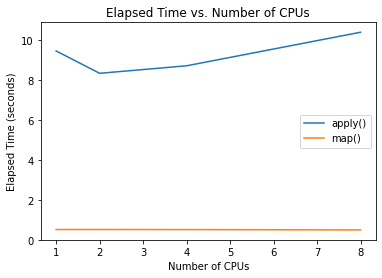

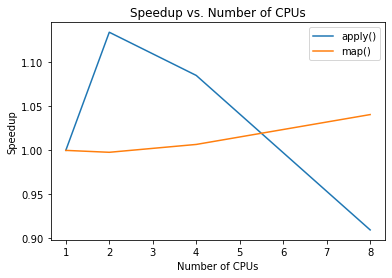

In [24]:
import matplotlib.pyplot as plt

# Define the data
num_cpus_list = [1, 2, 4, 8]
elapsed_time_apply_list = [elapsed_time_apply_1, elapsed_time_apply_2, elapsed_time_apply_4, elapsed_time_apply_8]
elapsed_time_map_list = [elapsed_time_map_1, elapsed_time_map_2, elapsed_time_map_4, elapsed_time_map_8]

# Plot the elapsed time as the number of CPUs increases
plt.figure()
plt.plot(num_cpus_list, elapsed_time_apply_list, label="apply()")
plt.plot(num_cpus_list, elapsed_time_map_list, label="map()")
plt.xlabel("Number of CPUs")
plt.ylabel("Elapsed Time (seconds)")
plt.title("Elapsed Time vs. Number of CPUs")
plt.legend()
plt.savefig("elapsed_time_vs_num_cpus.png")

# Plot the speedup as the number of CPUs increases
speedup_apply = [elapsed_time_apply_list[0] / t for t in elapsed_time_apply_list]
speedup_map = [elapsed_time_map_list[0] / t for t in elapsed_time_map_list]

plt.figure()
plt.plot(num_cpus_list, speedup_apply, label="apply()")
plt.plot(num_cpus_list, speedup_map, label="map()")
plt.xlabel("Number of CPUs")
plt.ylabel("Speedup")
plt.title("Speedup vs. Number of CPUs")
plt.legend()
plt.savefig("speedup_vs_num_cpus.png")

In this bar graph, we can observe how the elapsed time changes with different "chunks" for the Dask array. The optimal chunk size depends on the specific problem and the available resources (e.g., memory and CPU). Smaller chunks may lead to higher overhead, while larger chunks may not fully utilize the available resources. 

## <u>Part 3</u>

Performance Comparison between NumPy Array and Dask Array
    
### 1. Create a NumPy array and calculate the mean of every row
To create a NumPy array with random integer numbers in [1, 10) and shape (30000, 20000), and then calculate the mean of every row

In [31]:
import numpy as np
import time

np.random.seed(1)
np_arr = np.random.randint(1, 10, (30000, 20000))

start_time = time.time()
np_mean = np.mean(np_arr, axis=1)
elapsed_time_numpy = time.time() - start_time
print(f"Elapsed time (NumPy): {elapsed_time_numpy:.2f} seconds")

Elapsed time (NumPy): 0.67 seconds


### 2. Create a Dask array with the same data and set the "chunks" to (1000, 1000)
To create a Dask array with the same data as the NumPy array and set the "chunks" to (1000, 1000), we can use the following code:

In [32]:
import dask.array as da

da4 = da.from_array(np_arr, chunks=(1000, 1000))
da4

dask.array<array, shape=(30000, 20000), dtype=int64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [33]:
%%time
da4_mean=da4.mean(axis=1)


CPU times: user 5.23 ms, sys: 870 µs, total: 6.1 ms
Wall time: 5.84 ms


### 3. Use numpy method to calculate the size of da4 and the size of this chunk array (1000, 1000), then compare your calculations with the result about Bytes of Array and Chunk of da4.  

Calculate the size of the Dask array and compare with the NumPy array To calculate the size of the Dask array and compare it with the NumPy array, we can use the following code:

In [34]:
size_numpy = np_arr.nbytes
size_dask = da4.nbytes
chunk_size = da4.chunks[0][0] * da4.chunks[1][0] * da4.dtype.itemsize
print(f"Size of single chunk: {chunk_size} bytes")
print(f"Size of Dask array: {size_dask} bytes")

print(f"Dasks reported size of da4: {da4.nbytes} bytes")
print(f"Dasks reported size of a single chunk: {da4.chunks[0][0] * da4.chunks[1][0] * da4.dtype.itemsize} bytes")

Size of single chunk: 8000000 bytes
Size of Dask array: 4800000000 bytes
Dasks reported size of da4: 4800000000 bytes
Dasks reported size of a single chunk: 8000000 bytes


### 4. Set timers to calculate the Dask array with different "chunks"
To calculate the Dask array with different "chunks" and measure the elapsed time, you can use the following code:

In [35]:
chunks_list = [(1000, 1000), (3000, 2000), (300, 200)]
elapsed_time_dask_list = []

for chunks in chunks_list:
    da4 = da.from_array(np_arr, chunks=chunks)
    start_time = time.time()
    #da_mean = da4.mean(axis=1).compute()
    da4.compute()
    elapsed_time_dask = time.time() - start_time
    elapsed_time_dask_list.append(elapsed_time_dask)
    print(f"Elapsed time (Dask, chunks={chunks}): {elapsed_time_dask:.2f} seconds")

Elapsed time (Dask, chunks=(1000, 1000)): 2.10 seconds
Elapsed time (Dask, chunks=(3000, 2000)): 1.87 seconds
Elapsed time (Dask, chunks=(300, 200)): 2.24 seconds


### 5. Plot a bar graph of the time with different "chunks" and analyze the reason
To plot a bar graph of the time with different "chunks" and analyze the reason, you can use the following code:

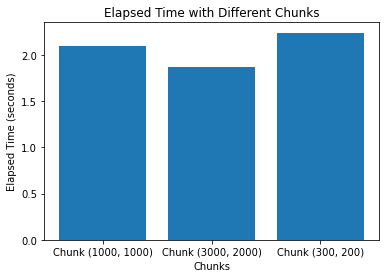

In [36]:
import matplotlib.pyplot as plt

x_labels = [f'Chunk {chunks}' for chunks in chunks_list]
elapsed_times = elapsed_time_dask_list

plt.bar(x_labels, elapsed_times)
plt.xlabel("Chunks")
plt.ylabel("Elapsed Time (seconds)")
plt.title("Elapsed Time with Different Chunks")
plt.savefig("Elapsed Time with Different Chunks.png")
plt.show()

Using different chunk sizes in Dask is about finding the right balance between reducing computational overhead and managing memory usage effectively. This involves considering factors such as the size and nature of your data, the type of computations you are performing, and the characteristics of your storage format

- **(300, 200) Chunk Size:**

This chunk size is the smallest among the tested sizes. Smaller chunks increase the overhead associated with parallelizing the computation and can result in longer execution times. While smaller chunks can be beneficial for some tasks, they may not be the most efficient choice for all operations.

- **(1000, 1000) Chunk Size:**

This chunk size is relatively larger, and Dask can efficiently process larger chunks, as they allow for better parallelism and reduced overhead when processing data. Therefore, the computation time is relatively faster compared to smaller chunks.


- **(3000, 2000) Chunk Size:**

This chunk size is smaller than the original chunk size but still relatively large. It offers some level of parallelism but doesn't have the same advantage as the original chunk size. However, it's still faster than the smallest chunk size.


The time it takes to calculate the mean of every row in the dask array depends on the chunk size because of the way dask operates. Dask breaks up the array into chunks and performs operations on these chunks in parallel. If the chunks are too small, the overhead of managing the chunks can dominate the computation time. If the chunks are too large, they may not fit into memory, causing swapping and other memory management issues that can slow down the computation. Therefore, there is an optimal chunk size that minimizes the computation time, and this optimal size depends on the specific operation (in this case, calculating the mean), the size of the array, and the available memory

## Conclusion

In conclusion, the multiprocessing.Pool module in Python provides a convenient way to parallelize the execution of a function across multiple input values, distributing the input data across processes (data parallelism). This can significantly speed up the execution time for large datasets, especially when you have a multi-core CPU.
However, it's important to choose the right method (apply() or map()) and the right number of CPUs for your specific task. Too many processes can lead to excessive overhead, while too few processes might not fully utilize the CPU. 